# FSC curve of empiar10311_stack_crop.mrc VS several sigma values in Gaussian Denoising

In [1]:
import mrcfile # pip install mrcfil
import matplotlib.pyplot as plt # pip install matplotlib
from self_fourier_shell_correlation import fsc_utils as fsc # pip install --upgrade --force-reinstall "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"
from denoising.volume.gaussian import Monochrome_Denoising as GD # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
from denoising.utils import get_gaussian_kernel # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
import numpy as np
import logging

In [2]:
vol_name = "empiar10311_stack_crop"
vol_extension = ".mrc"
vols_path = "/mnt2/TomogramDenoising/vols/"

In [3]:
from collections import namedtuple # Comes with the PSL
Args = namedtuple("args", ["vol"])
args = Args(vols_path + vol_name + vol_extension)

In [4]:
with mrcfile.open(args.vol, permissive=True) as mrc:
    vol= mrc.data

In [5]:
vol.shape

(100, 1024, 1024)

In [6]:
vol = vol[0:100, 0:100, 0:100]

In [7]:
#Z_dim = vol.shape[0]
#Z2 = Z_dim//2
#plt.imshow(vol[Z2], cmap="gray")

In [8]:
def get_kernel_coeffs(sigma):
    sigmas = np.array([sigma, sigma, sigma])
    kernel = [None]*3
    kernel[0] = get_gaussian_kernel(sigmas[0])
    kernel[1] = get_gaussian_kernel(sigmas[1])
    kernel[2] = get_gaussian_kernel(sigmas[2])
    return kernel

In [9]:
sigma_0_1 = 0.1
kernel = get_kernel_coeffs(sigma_0_1)

In [10]:
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [11]:
denoiser = GD(logger)
vol_denoised = denoiser.filter(vol, kernel)

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


In [14]:
freq, c_0_1 = fsc.get_FSC_curve(vol, vol_denoised)

In [15]:
sigma_1_0 = 1.0
kernel = get_kernel_coeffs(sigma_1_0)
vol_denoised = denoiser.filter(vol, kernel)
freq, c_1_0 = fsc.get_FSC_curve(vol, vol_denoised)

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


In [16]:
sigma_1_5 = 1.5
kernel = get_kernel_coeffs(sigma_1_5)
vol_denoised = denoiser.filter(vol, kernel)
freq, c_1_5 = fsc.get_FSC_curve(vol, vol_denoised)

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


In [17]:
sigma_2_0 = 2.0
kernel = get_kernel_coeffs(sigma_2_0)
vol_denoised = denoiser.filter(vol, kernel)
freq, c_2_0 = fsc.get_FSC_curve(vol, vol_denoised)

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2738234/25084906.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, c_0_1, label=f"$\sigma$={sigma_0_1}")
/tmp/ipykernel_2738234/25084906.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, c_1_0, label=f"$\sigma$={sigma_1_0}")
/tmp/ipykernel_2738234/25084906.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, c_1_5, label=f"$\sigma$={sigma_1_5}")
/tmp/ipykernel_2738234/25084906.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, c_2_0, label=f"$\sigma$={sigma_2_0}")


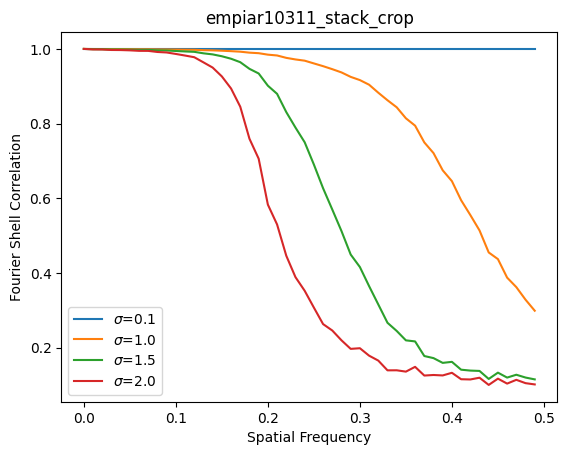

In [19]:
plt.title(vol_name)
plt.xlabel("Spatial Frequency")
plt.ylabel("Fourier Shell Correlation")
plt.plot(freq, c_0_1, label=f"$\sigma$={sigma_0_1}")
plt.plot(freq, c_1_0, label=f"$\sigma$={sigma_1_0}")
plt.plot(freq, c_1_5, label=f"$\sigma$={sigma_1_5}")
plt.plot(freq, c_2_0, label=f"$\sigma$={sigma_2_0}")
plt.legend()
plt.savefig(vol_name + "_GD" + ".svg")
plt.show()